## Clustering

### 1. Import Libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

### 2. Read the Data

In [121]:
file_path = "World_development_mesurement (2).xlsx"  # Update the path if needed
data = pd.read_excel(file_path)

In [122]:
data.head(10)

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
5,0.042,NaN,301.0,Burundi,NaN,NaN,NaN,"$870,486,066",0.063,$7,...,47.0,0.0,1,0.490,0.481,0.029,6674286,0.082,"$1,400,000","$14,000,000"
6,0.041,NaN,3432.0,Cameroon,NaN,NaN,6310.0,"$9,287,367,569",0.044,$26,...,51.0,0.0,1,0.453,0.513,0.034,15927713,0.455,"$132,000,000","$241,000,000"
7,0.039,NaN,268.0,Central African Republic,NaN,NaN,NaN,"$914,500,332",0.043,$11,...,42.0,0.0,1,0.423,0.537,0.040,3638316,0.376,"$5,000,000","$33,000,000"
8,0.051,NaN,176.0,Chad,NaN,NaN,NaN,"$1,385,058,212",0.063,$10,...,46.0,0.0,1,0.490,0.482,0.028,8301151,0.216,"$14,000,000","$56,000,000"
9,0.039,NaN,84.0,Comoros,NaN,NaN,NaN,"$201,899,884",0.035,$13,...,56.0,NaN,1,0.415,0.554,0.031,528312,0.281,"$15,000,000",NaN


### 3. EDA (Understanding and Cleaning the Data)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

###### Converting country form categorical type to numerical type

#### Label Encoding

In [124]:
# Create a LabelEncoder object
lable = LabelEncoder()

# Fit and transform the "Country" column in the DataFrame
data['Country_encoded'] = lable.fit_transform(data['Country'])

In [125]:
data['Country_encoded']=data['Country_encoded'].astype(float)

In [126]:
data.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000",2.0
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000",5.0
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000",20.0
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000",25.0
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000",29.0


###### Some columns has $ and % so we have to remove it

In [127]:
## Remove $ from columns
data['GDP']=data['GDP'].astype(str).str.replace('$','',regex=True).str.replace(',','')
data['GDP']=pd.to_numeric(data['GDP'],errors='coerce')

data['Health Exp/Capita']=data['Health Exp/Capita'].astype(str).str.replace('$','',regex=True)
data['Health Exp/Capita']=pd.to_numeric(data['Health Exp/Capita'], errors='coerce')

data['Tourism Inbound']=data['Tourism Inbound'].astype(str).str.replace('$','',regex=True).str.replace(',', '')
data['Tourism Inbound'] = pd.to_numeric(data['Tourism Inbound'], errors='coerce')

data['Tourism Outbound']=data['Tourism Outbound'].astype(str).str.replace('$','',regex=True).str.replace(',', '')
data['Tourism Outbound'] = pd.to_numeric(data['Tourism Outbound'], errors='coerce')

## Remove %
data['Business Tax Rate']=data['Business Tax Rate'].astype(str).str.replace('%','',regex=True)
data['Business Tax Rate'] = pd.to_numeric(data['Business Tax Rate'], errors='coerce')

In [128]:
data.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,...,0.0,1,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0,2.0
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,...,0.0,1,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0,5.0
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,...,0.0,1,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0,20.0
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,...,0.1,1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0,25.0
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,2.610959e+09,0.051,12.0,...,0.0,1,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0,29.0


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   float64
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       1932 non-null   float64
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [58]:
data.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound', 'Country_encoded'],
      dtype='object')

In [130]:
## Rename columns
data = data.rename(columns={'Birth Rate': 'BirthRate', 'Business Tax Rate': 'BusinessTaxRate','CO2 Emissions':'CO2Emissions','Days to Start Business':'DaystoStartBusiness','Ease of Business':'EaseofBusiness','Energy Usage':'EnergyUsage',
                            'Health Exp % GDP':'HealthExpGDP','Health Exp/Capita':'HealthExpCapita','Hours to do Tax':'HourstodoTax','Infant Mortality Rate':'InfantMortalityRate','Internet Usage':'InternetUsage','Lending Interest':'LendingInterest',
                            'Life Expectancy Female':'LifeExpectancyFemale','Life Expectancy Male':'LifeExpectancyMale','Mobile Phone Usage':'MobilePhoneUsage','Number of Records':'NumberofRecords','Population 0-14':'Population0to14',
                            'Population 15-64':'Population15to64','Population 65+':'Populationmorethan65','Population Total':'PopulationTotal','Population Urban':'PopulationUrban','Tourism Inbound':'TourismInbound','Tourism Outbound':'TourismOutbound'})
data.columns

Index(['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'Country',
       'DaystoStartBusiness', 'EaseofBusiness', 'EnergyUsage', 'GDP',
       'HealthExpGDP', 'HealthExpCapita', 'HourstodoTax',
       'InfantMortalityRate', 'InternetUsage', 'LendingInterest',
       'LifeExpectancyFemale', 'LifeExpectancyMale', 'MobilePhoneUsage',
       'NumberofRecords', 'Population0to14', 'Population15to64',
       'Populationmorethan65', 'PopulationTotal', 'PopulationUrban',
       'TourismInbound', 'TourismOutbound', 'Country_encoded'],
      dtype='object')

In [131]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
BirthRate                119
BusinessTaxRate         1281
CO2Emissions             579
Country                    0
DaystoStartBusiness      986
EaseofBusiness          2519
EnergyUsage              919
GDP                      210
HealthExpGDP             309
HealthExpCapita          772
HourstodoTax            1288
InfantMortalityRate      260
InternetUsage            173
LendingInterest          824
LifeExpectancyFemale     136
LifeExpectancyMale       136
MobilePhoneUsage         167
NumberofRecords            0
Population0to14          220
Population15to64         220
Populationmorethan65     220
PopulationTotal            0
PopulationUrban           26
TourismInbound           368
TourismOutbound          471
Country_encoded            0
dtype: int64


In [132]:
## Drop "Number of Records" column
data = data.drop(['Country','NumberofRecords'],axis=1)

C:\Users\lokio\AppData\Local\Temp\ipykernel_4248\1346365141.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.BirthRate,ax=axes[0,0])
C:\Users\lokio\AppData\Local\Temp\ipykernel_4248\1346365141.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.BusinessTaxRate,ax=axes[0,1])
C:\Users

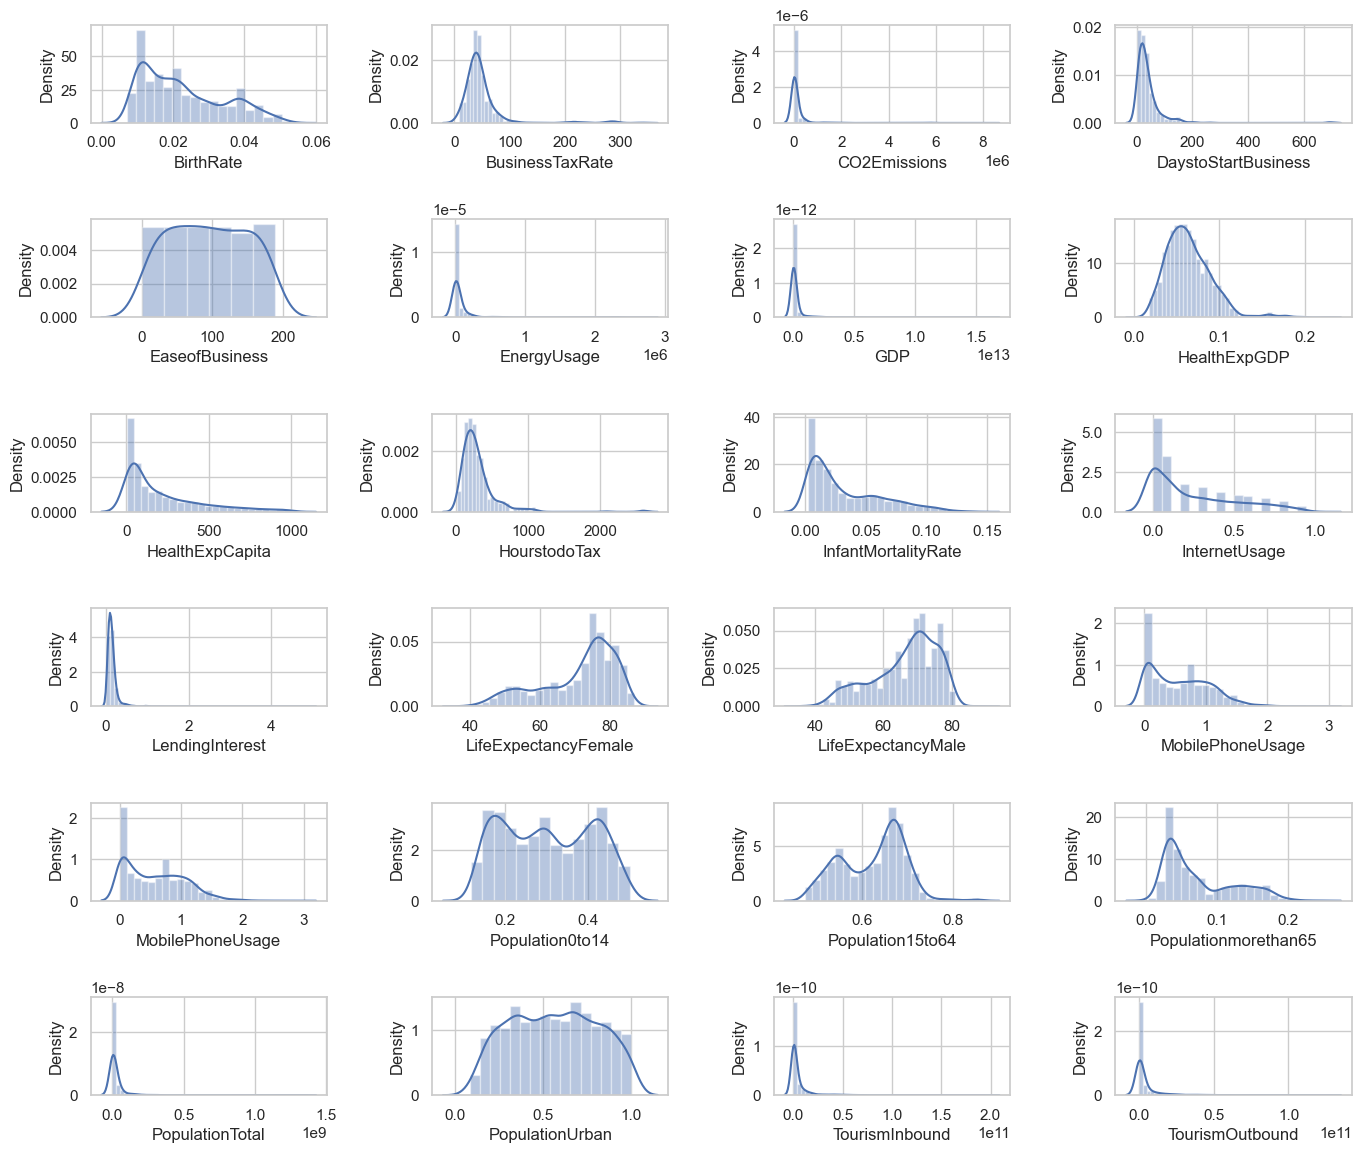

In [133]:
## Distribution plots for all columns
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.distplot(data.BirthRate,ax=axes[0,0])
sns.distplot(data.BusinessTaxRate,ax=axes[0,1])
sns.distplot(data.CO2Emissions,ax=axes[0,2])
sns.distplot(data.DaystoStartBusiness,ax=axes[0,3])
sns.distplot(data.EaseofBusiness,ax=axes[1,0])
sns.distplot(data.EnergyUsage,ax=axes[1,1])
sns.distplot(data.GDP,ax=axes[1,2])
sns.distplot(data.HealthExpGDP,ax=axes[1,3])
sns.distplot(data.HealthExpCapita,ax=axes[2,0])
sns.distplot(data.HourstodoTax,ax=axes[2,1])
sns.distplot(data.InfantMortalityRate,ax=axes[2,2])
sns.distplot(data.InternetUsage,ax=axes[2,3])
sns.distplot(data.LendingInterest,ax=axes[3,0])
sns.distplot(data.LifeExpectancyFemale,ax=axes[3,1])
sns.distplot(data.LifeExpectancyMale,ax=axes[3,2])
sns.distplot(data.MobilePhoneUsage,ax=axes[3,3])
sns.distplot(data.MobilePhoneUsage,ax=axes[4,0])
sns.distplot(data.Population0to14,ax=axes[4,1])
sns.distplot(data.Population15to64,ax=axes[4,2])
sns.distplot(data.Populationmorethan65,ax=axes[4,3])
sns.distplot(data.PopulationTotal,ax=axes[5,0])
sns.distplot(data.PopulationUrban,ax=axes[5,1])
sns.distplot(data.TourismInbound,ax=axes[5,2])
sns.distplot(data.TourismOutbound,ax=axes[5,3])
plt.tight_layout(pad=2.0)

###### From above visvalization we can see that,
###### 'BusinessTaxRate', 'EaseofBusiness', 'HealthExpGDP', 'HourstodoTax' and 'Population0to14' columns has normal distribution so we replace missing values by mean.
###### And for remaining columns with skewed data we replace missing values by median.

In [134]:
## Replace missing values by mean

data['BusinessTaxRate'] = data['BusinessTaxRate'].fillna(data['BusinessTaxRate'].mean())
data['EaseofBusiness'] = data['EaseofBusiness'].fillna(data['EaseofBusiness'].mean())
data['HealthExpGDP'] = data['HealthExpGDP'].fillna(data['HealthExpGDP'].mean())
data['HourstodoTax'] = data['HourstodoTax'].fillna(data['HourstodoTax'].mean())
data['Population0to14'] = data['Population0to14'].fillna(data['Population0to14'].mean())

## Replace missing values by median

data['BirthRate'] = data['BirthRate'].fillna(data['BirthRate'].median())
data['CO2Emissions'] = data['CO2Emissions'].fillna(data['CO2Emissions'].median())
data['DaystoStartBusiness'] = data['DaystoStartBusiness'].fillna(data['DaystoStartBusiness'].median())
data['EnergyUsage'] = data['EnergyUsage'].fillna(data['EnergyUsage'].median())
data['HealthExpCapita']=data['HealthExpCapita'].fillna(data['HealthExpCapita'].mean())
data['GDP'] = data['GDP'].fillna(data['GDP'].median())
data['InfantMortalityRate'] = data['InfantMortalityRate'].fillna(data['InfantMortalityRate'].median())
data['InternetUsage'] = data['InternetUsage'].fillna(data['InternetUsage'].median())
data['LendingInterest'] = data['LendingInterest'].fillna(data['LendingInterest'].median())
data['LifeExpectancyFemale'] = data['LifeExpectancyFemale'].fillna(data['LifeExpectancyFemale'].median())
data['LifeExpectancyMale'] = data['LifeExpectancyMale'].fillna(data['LifeExpectancyMale'].median())
data['MobilePhoneUsage'] = data['MobilePhoneUsage'].fillna(data['MobilePhoneUsage'].median())
data['TourismInbound'] = data['TourismInbound'].fillna(data['TourismInbound'].median())
data['TourismOutbound'] = data['TourismOutbound'].fillna(data['TourismOutbound'].median())
data['Population15to64'] = data['Population15to64'].fillna(data['Population15to64'].median())
data['Populationmorethan65'] = data['Populationmorethan65'].fillna(data['Populationmorethan65'].median())
data['PopulationUrban'] = data['PopulationUrban'].fillna(data['PopulationUrban'].median())

In [135]:
## check missising values
print("{} missing values present in whole data.".format(data.isnull().sum().sum()))

0 missing values present in whole data.


In [136]:
data

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,LifeExpectancyMale,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded
0,0.020,48.966901,87931.0,26.0,94.875676,26998.0,5.479006e+10,0.03500,60.000000,302.068503,...,67.0,0.0,0.342000,0.6190,0.039,31719449,0.599,1.020000e+08,1.930000e+08,2.0
1,0.050,48.966901,9542.0,26.0,94.875676,7499.0,9.129595e+09,0.03400,22.000000,302.068503,...,44.0,0.0,0.476000,0.4990,0.025,13924930,0.324,3.400000e+07,1.460000e+08,5.0
2,0.043,48.966901,1617.0,26.0,94.875676,1983.0,2.359122e+09,0.04300,15.000000,302.068503,...,53.0,0.0,0.454000,0.5170,0.029,6949366,0.383,7.700000e+07,5.000000e+07,20.0
3,0.027,48.966901,4276.0,26.0,94.875676,1836.0,5.788312e+09,0.04700,152.000000,302.068503,...,49.0,0.1,0.383000,0.5870,0.029,1755375,0.532,2.270000e+08,2.090000e+08,25.0
4,0.046,48.966901,1041.0,26.0,94.875676,14338.0,2.610959e+09,0.05100,12.000000,302.068503,...,49.0,0.0,0.468000,0.5050,0.028,11607944,0.178,2.300000e+07,3.000000e+07,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,48.966901,8529.0,26.0,94.875676,14338.0,1.507975e+10,0.06417,214.627847,302.068503,...,69.0,0.5,0.303051,0.6425,0.052,32427,0.911,6.885000e+08,4.560000e+08,193.0
2700,0.013,46.400000,8529.0,5.0,4.000000,2132446.0,1.624460e+13,0.17900,214.627847,175.000000,...,76.0,1.0,0.196000,0.6670,0.136,313873685,0.811,2.000920e+11,1.265730e+11,198.0
2701,0.015,41.900000,8529.0,7.0,85.000000,14338.0,5.000435e+10,0.08900,214.627847,310.000000,...,74.0,1.5,0.220000,0.6390,0.140,3395253,0.948,2.222000e+09,1.028000e+09,199.0
2702,0.020,61.900000,8529.0,144.0,180.000000,14338.0,3.812862e+11,0.04600,593.000000,792.000000,...,72.0,1.0,0.288000,0.6520,0.060,29954782,0.889,9.040000e+08,3.202000e+09,202.0


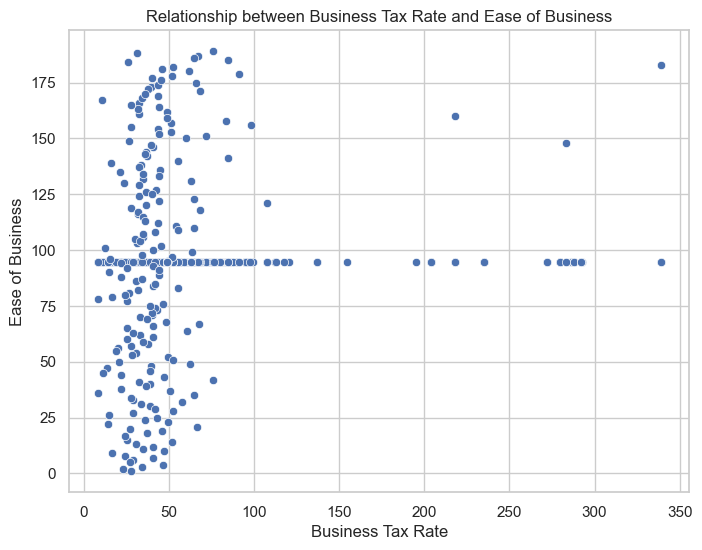

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BusinessTaxRate', y='EaseofBusiness', data=data)
plt.title('Relationship between Business Tax Rate and Ease of Business')
plt.xlabel('Business Tax Rate')
plt.ylabel('Ease of Business')
plt.show()


# # The scatter plot shows a general negative relationship between business tax rate and ease of business. This means that as the business tax rate increases, the ease of business tends to decrease. However, there are also some outliers that do not follow this trend.


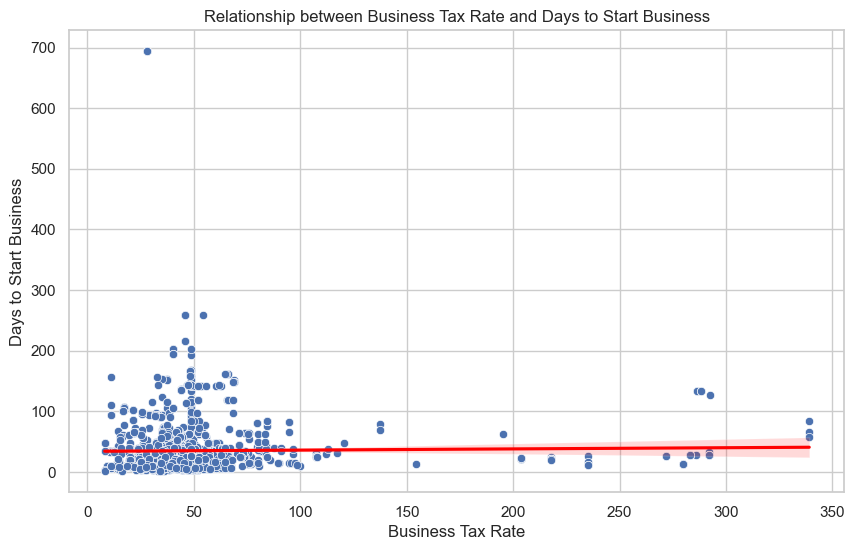

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with Business Tax Rate and Days to Start Business
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BusinessTaxRate', y='DaystoStartBusiness', data=data)

# Optional: Adding a trend line
sns.regplot(x='BusinessTaxRate', y='DaystoStartBusiness', data=data, scatter=False, color='red')

plt.title('Relationship between Business Tax Rate and Days to Start Business')
plt.xlabel('Business Tax Rate')
plt.ylabel('Days to Start Business')
plt.show()


# The scatter plot shows a weak negative relationship between business tax rate and days to start a business. This means that as the business tax rate increases, the number of days it takes to start a business tends to decrease slightly, but there is a lot of variation in the data.


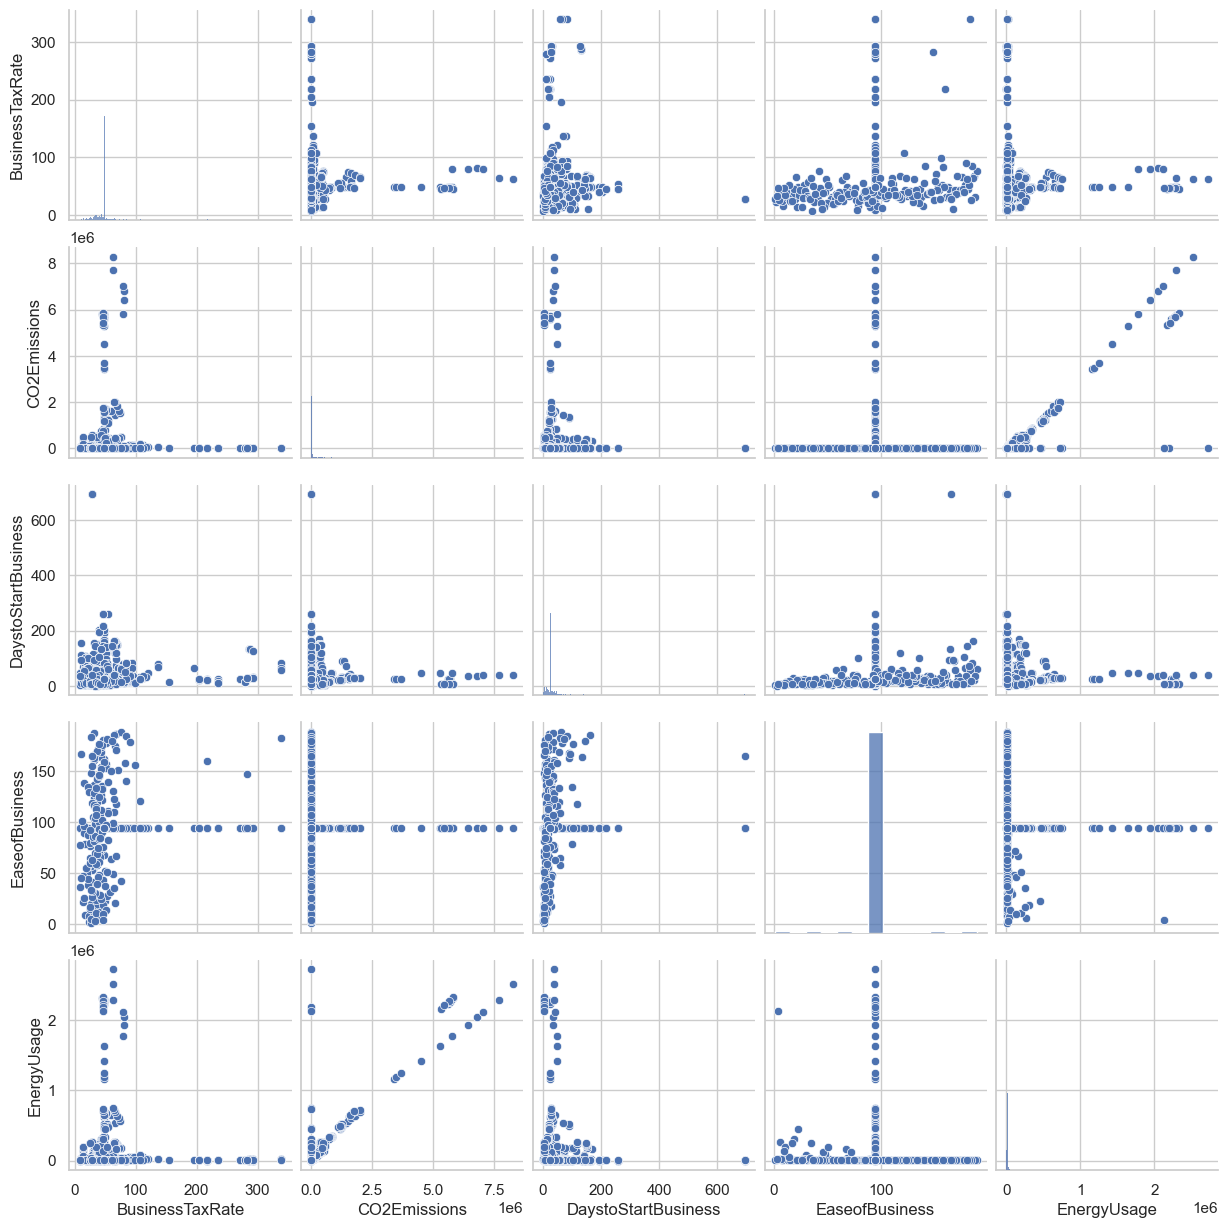

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for all the variables
sns.pairplot(data[['BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness', 'EaseofBusiness', 'EnergyUsage']])
plt.show()


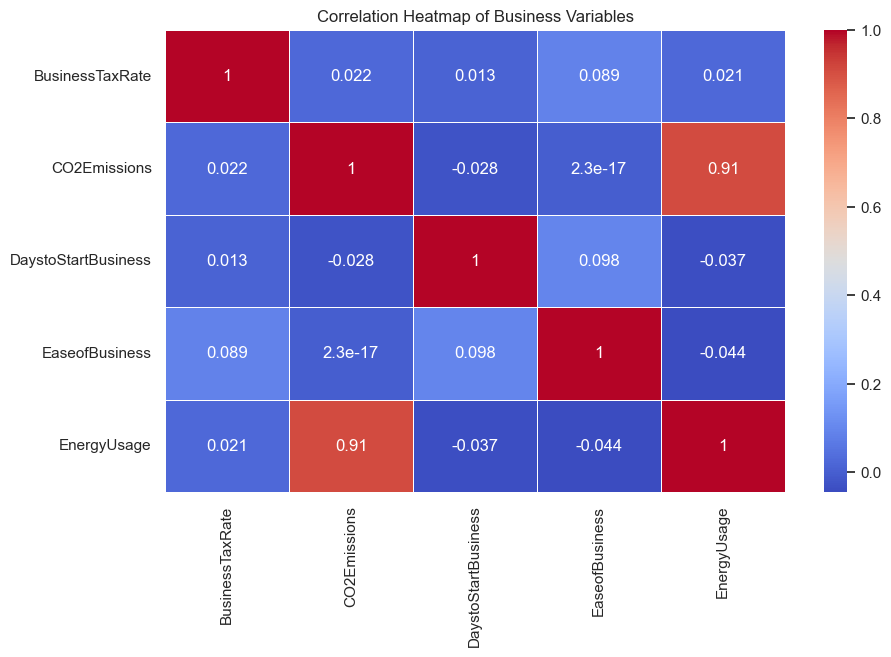

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = data[['BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness', 'EaseofBusiness', 'EnergyUsage']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Business Variables')
plt.show()


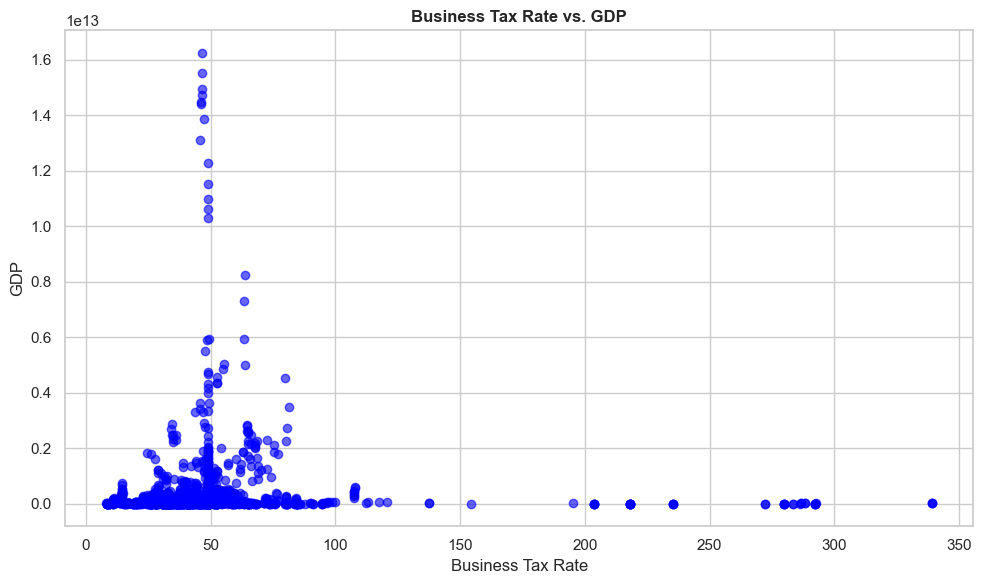

In [70]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it contains a 'GDP' column
plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(data['BusinessTaxRate'], data['GDP'], color='blue', alpha=0.6)

# Add labels and title
plt.title('Business Tax Rate vs. GDP', fontweight='bold')
plt.xlabel('Business Tax Rate')
plt.ylabel('GDP')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


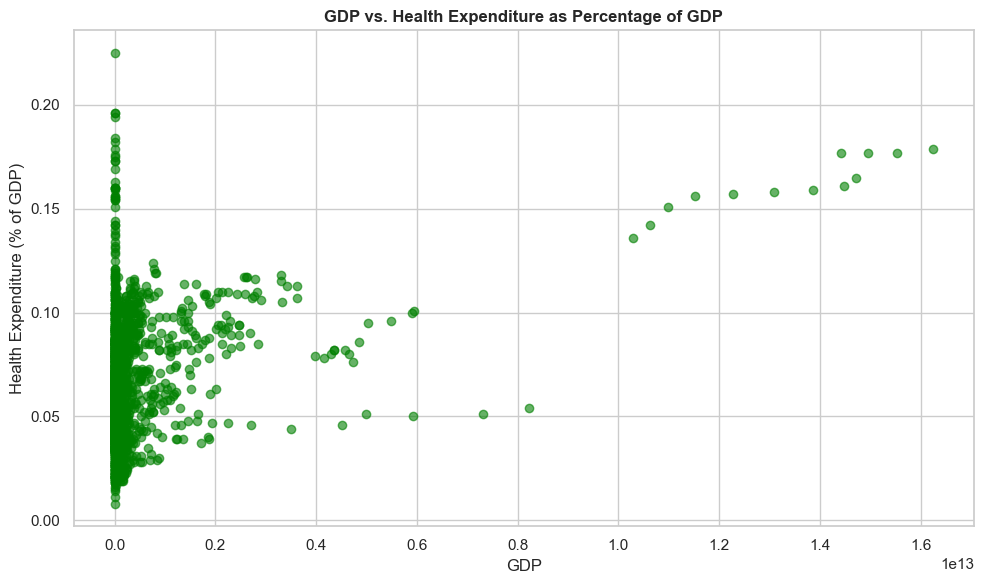

In [71]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it contains 'GDP' and 'HealthExpGDP' columns
plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(data['GDP'], data['HealthExpGDP'], color='green', alpha=0.6)

# Add labels and title
plt.title('GDP vs. Health Expenditure as Percentage of GDP', fontweight='bold')
plt.xlabel('GDP')
plt.ylabel('Health Expenditure (% of GDP)')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [72]:
# Get all column names from the 'data' DataFrame
columns = data.columns

# Display column names
print(columns)


Index(['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
       'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP',
       'HealthExpCapita', 'HourstodoTax', 'InfantMortalityRate',
       'InternetUsage', 'LendingInterest', 'LifeExpectancyFemale',
       'LifeExpectancyMale', 'MobilePhoneUsage', 'Population0to14',
       'Population15to64', 'Populationmorethan65', 'PopulationTotal',
       'PopulationUrban', 'TourismInbound', 'TourismOutbound',
       'Country_encoded'],
      dtype='object')


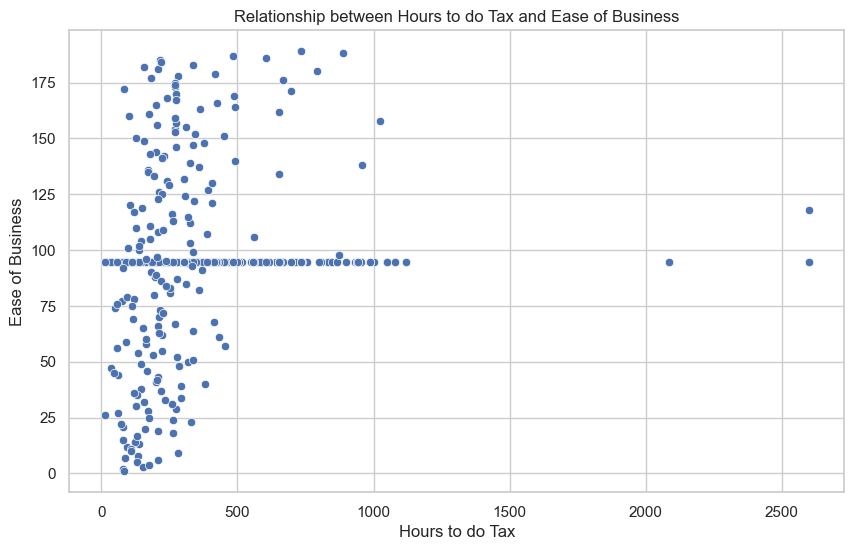

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'data'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HourstodoTax', y='EaseofBusiness', data=data)

# Adding labels and title
plt.xlabel('Hours to do Tax')
plt.ylabel('Ease of Business')
plt.title('Relationship between Hours to do Tax and Ease of Business')
plt.show()


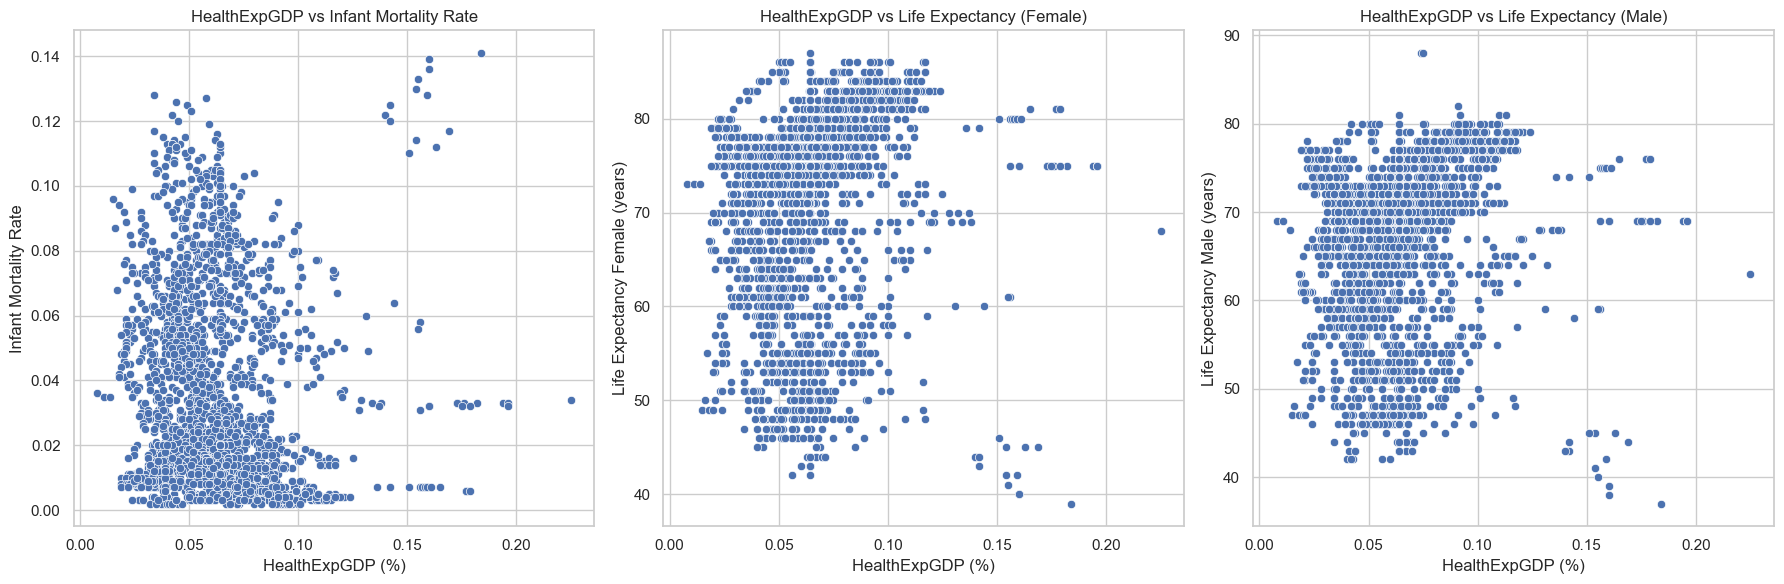

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(18, 6))

# 1st Plot: HealthExpGDP vs InfantMortalityRate
plt.subplot(1, 3, 1)
sns.scatterplot(x='HealthExpGDP', y='InfantMortalityRate', data=data)
plt.title('HealthExpGDP vs Infant Mortality Rate')
plt.xlabel('HealthExpGDP (%)')
plt.ylabel('Infant Mortality Rate')

# 2nd Plot: HealthExpGDP vs LifeExpectancyFemale
plt.subplot(1, 3, 2)
sns.scatterplot(x='HealthExpGDP', y='LifeExpectancyFemale', data=data)
plt.title('HealthExpGDP vs Life Expectancy (Female)')
plt.xlabel('HealthExpGDP (%)')
plt.ylabel('Life Expectancy Female (years)')

# 3rd Plot: HealthExpGDP vs LifeExpectancyMale
plt.subplot(1, 3, 3)
sns.scatterplot(x='HealthExpGDP', y='LifeExpectancyMale', data=data)
plt.title('HealthExpGDP vs Life Expectancy (Male)')
plt.xlabel('HealthExpGDP (%)')
plt.ylabel('Life Expectancy Male (years)')

# Display the plots
plt.tight_layout()
plt.show()


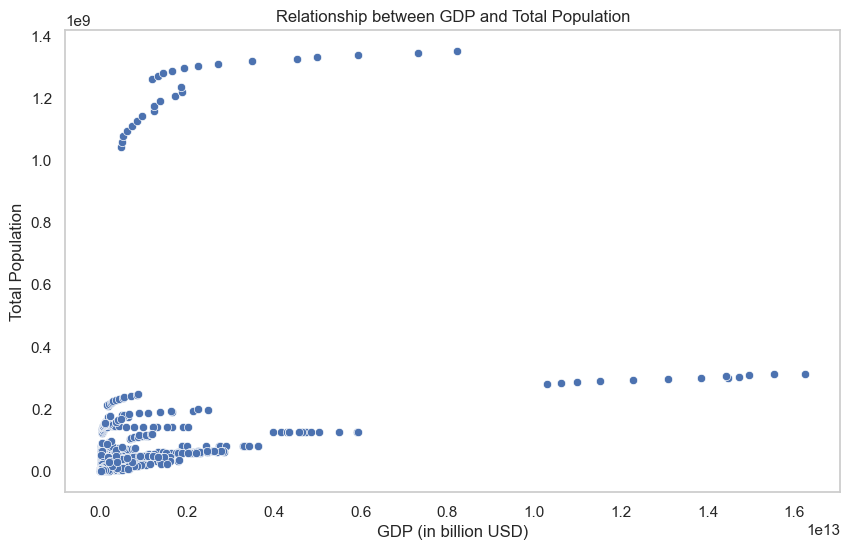

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x='GDP', y='PopulationTotal', data=data)

# Add titles and labels
plt.title('Relationship between GDP and Total Population')
plt.xlabel('GDP (in billion USD)')
plt.ylabel('Total Population')

# Display the plot
plt.grid()
plt.show()



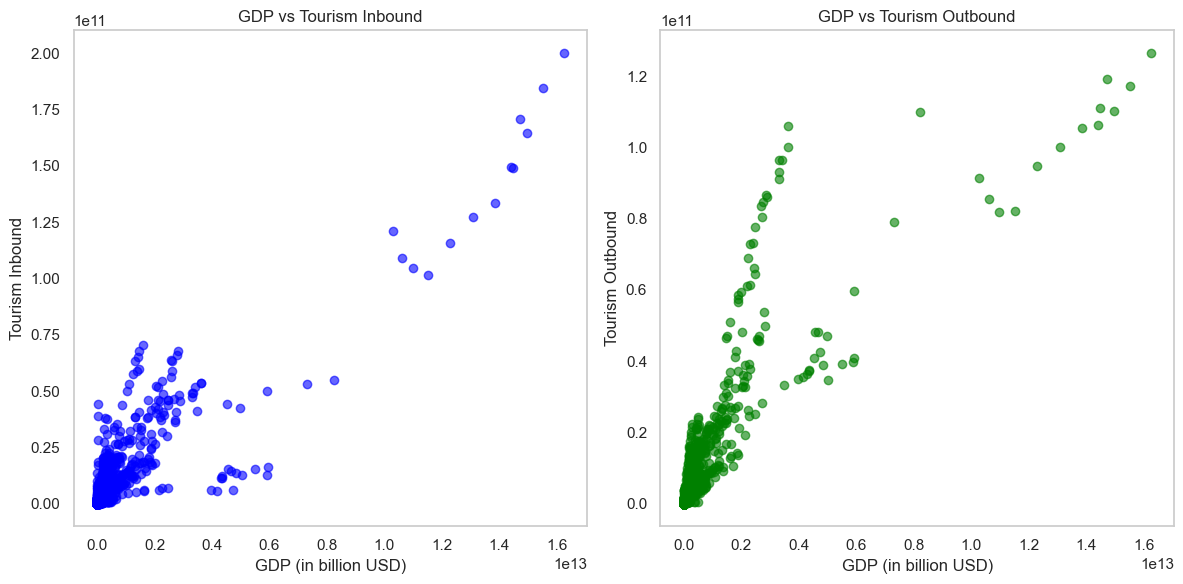

In [76]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the columns 'GDP', 'TourismInbound', and 'TourismOutbound'

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Scatter plot for GDP vs Tourism Inbound
plt.subplot(1, 2, 1)
plt.scatter(data['GDP'], data['TourismInbound'], color='blue', alpha=0.6)
plt.title('GDP vs Tourism Inbound')
plt.xlabel('GDP (in billion USD)')
plt.ylabel('Tourism Inbound')
plt.grid()

# Scatter plot for GDP vs Tourism Outbound
plt.subplot(1, 2, 2)
plt.scatter(data['GDP'], data['TourismOutbound'], color='green', alpha=0.6)
plt.title('GDP vs Tourism Outbound')
plt.xlabel('GDP (in billion USD)')
plt.ylabel('Tourism Outbound')
plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [137]:
# Assuming 'data' is your DataFrame
columns_to_drop = [
    'HealthExpCapita',
    'Population0to14',
    'Population15to64',
    'Populationmorethan65',
    'PopulationUrban',
]

# Dropping the specified columns
data_filtered = data.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(data_filtered.head())


   BirthRate  BusinessTaxRate  CO2Emissions  DaystoStartBusiness  \
0      0.020        48.966901       87931.0                 26.0   
1      0.050        48.966901        9542.0                 26.0   
2      0.043        48.966901        1617.0                 26.0   
3      0.027        48.966901        4276.0                 26.0   
4      0.046        48.966901        1041.0                 26.0   

   EaseofBusiness  EnergyUsage           GDP  HealthExpGDP  HourstodoTax  \
0       94.875676      26998.0  5.479006e+10         0.035    302.068503   
1       94.875676       7499.0  9.129595e+09         0.034    302.068503   
2       94.875676       1983.0  2.359122e+09         0.043    302.068503   
3       94.875676       1836.0  5.788312e+09         0.047    302.068503   
4       94.875676      14338.0  2.610959e+09         0.051    302.068503   

   InfantMortalityRate  InternetUsage  LendingInterest  LifeExpectancyFemale  \
0                0.034            0.0            0.100

In [138]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Assuming data_filtered is your DataFrame
# Replace with your actual data
# Example: data_filtered = pd.read_csv('your_data.csv')

# Initialize IsolationForest
isolation_forest = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the data
isolation_forest.fit(data_filtered)

# Predict whether each data point is an outlier (-1) or inlier (1)
predictions = isolation_forest.predict(data_filtered)

# Count the number of outliers
outliers = np.sum(predictions == -1)

print(f"Number of outliers detected: {outliers}")


Number of outliers detected: 185


In [139]:
# Assuming the previous code where we applied Isolation Forest
# IsolationForest is already applied and predictions are made

# Add the predictions as a new column to the DataFrame
data_filtered['is_outlier'] = predictions

# Keep only the rows that are inliers (i.e., predictions == 1)
data_no_outliers = data_filtered[data_filtered['is_outlier'] == 1]

# Drop the 'is_outlier' column as it is no longer needed
data_no_outliers = data_no_outliers.drop(columns=['is_outlier'])

print(f"Number of rows after dropping outliers: {data_no_outliers.shape[0]}")


Number of rows after dropping outliers: 2519


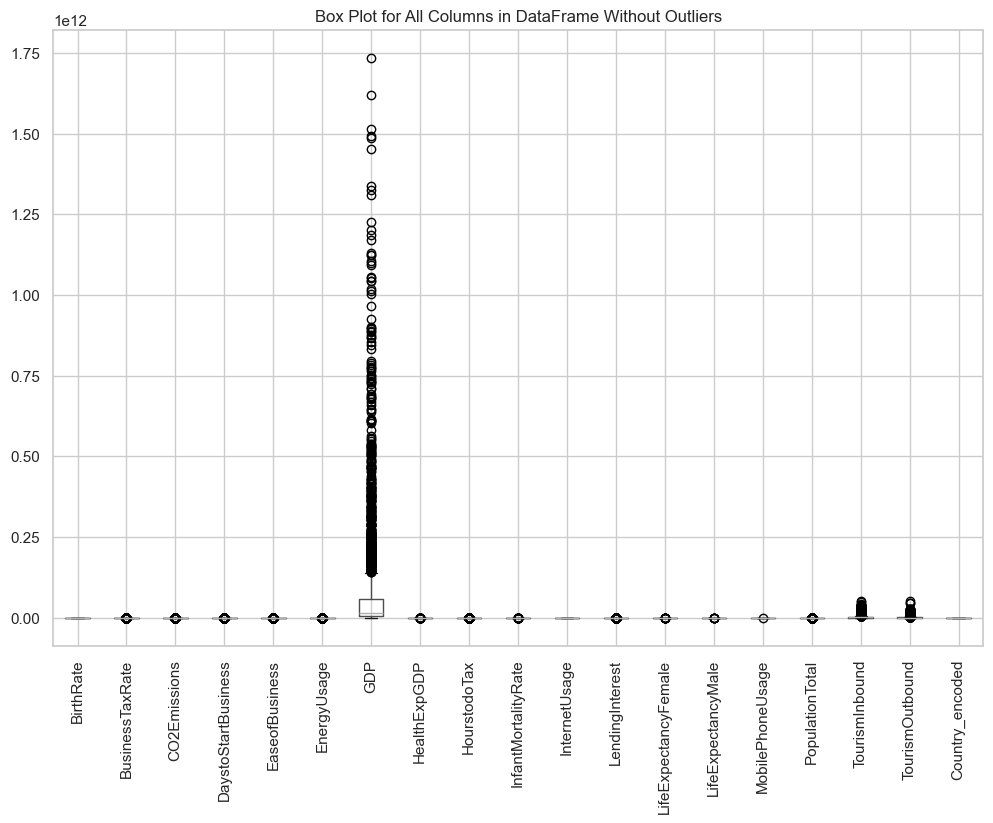

In [80]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size and style for better visibility
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create box plots for all numeric columns in the DataFrame
data_no_outliers.boxplot()

# Display the plot
plt.xticks(rotation=90)  # Rotate column names if they are long
plt.title('Box Plot for All Columns in DataFrame Without Outliers')
plt.show()


In [140]:
data_no_outliers

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HourstodoTax,InfantMortalityRate,InternetUsage,LendingInterest,LifeExpectancyFemale,LifeExpectancyMale,MobilePhoneUsage,PopulationTotal,TourismInbound,TourismOutbound,Country_encoded
0,0.020,48.966901,87931.0,26.0,94.875676,26998.0,5.479006e+10,0.03500,302.068503,0.034,0.0,0.100,71.0,67.0,0.0,31719449,1.020000e+08,1.930000e+08,2.0
2,0.043,48.966901,1617.0,26.0,94.875676,1983.0,2.359122e+09,0.04300,302.068503,0.090,0.0,0.120,57.0,53.0,0.0,6949366,7.700000e+07,5.000000e+07,20.0
3,0.027,48.966901,4276.0,26.0,94.875676,1836.0,5.788312e+09,0.04700,302.068503,0.054,0.0,0.155,52.0,49.0,0.1,1755375,2.270000e+08,2.090000e+08,25.0
4,0.046,48.966901,1041.0,26.0,94.875676,14338.0,2.610959e+09,0.05100,302.068503,0.096,0.0,0.120,52.0,49.0,0.0,11607944,2.300000e+07,3.000000e+07,29.0
5,0.042,48.966901,301.0,26.0,94.875676,14338.0,8.704861e+08,0.06300,302.068503,0.092,0.0,0.158,49.0,47.0,0.0,6674286,1.400000e+06,1.400000e+07,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,0.018,27.900000,8529.0,694.0,165.000000,14338.0,5.012121e+09,0.05900,199.000000,0.021,0.3,0.117,74.0,68.0,1.1,534541,7.900000e+07,5.800000e+07,178.0
2698,0.015,29.100000,8529.0,41.0,63.000000,14338.0,2.343634e+10,0.05400,210.000000,0.020,0.6,0.077,74.0,66.0,1.4,1337439,6.885000e+08,4.560000e+08,189.0
2699,0.020,48.966901,8529.0,26.0,94.875676,14338.0,1.507975e+10,0.06417,302.068503,0.020,0.1,0.120,75.0,69.0,0.5,32427,6.885000e+08,4.560000e+08,193.0
2701,0.015,41.900000,8529.0,7.0,85.000000,14338.0,5.000435e+10,0.08900,310.000000,0.010,0.5,0.112,80.0,74.0,1.5,3395253,2.222000e+09,1.028000e+09,199.0


C:\Users\lokio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lokio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lokio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lokio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

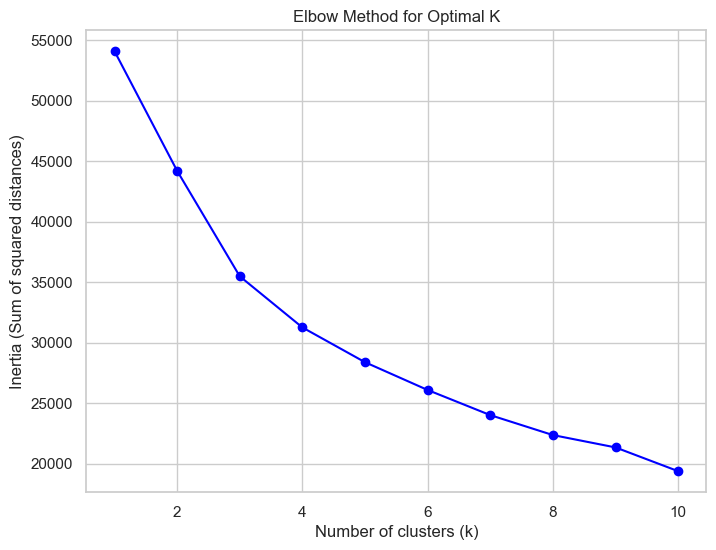

   BirthRate  BusinessTaxRate  CO2Emissions  DaystoStartBusiness  \
0      0.020        48.966901       87931.0                 26.0   
1      0.050        48.966901        9542.0                 26.0   
2      0.043        48.966901        1617.0                 26.0   
3      0.027        48.966901        4276.0                 26.0   
4      0.046        48.966901        1041.0                 26.0   

   EaseofBusiness  EnergyUsage           GDP  HealthExpGDP  HourstodoTax  \
0       94.875676      26998.0  5.479006e+10         0.035    302.068503   
1       94.875676       7499.0  9.129595e+09         0.034    302.068503   
2       94.875676       1983.0  2.359122e+09         0.043    302.068503   
3       94.875676       1836.0  5.788312e+09         0.047    302.068503   
4       94.875676      14338.0  2.610959e+09         0.051    302.068503   

   InfantMortalityRate  ...  LendingInterest  LifeExpectancyFemale  \
0                0.034  ...            0.100                  71

C:\Users\lokio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [82]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

# Step 2: Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)  # Checking for k values from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Step 3: Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.show()

# Step 4: Based on the elbow point, let's assume the optimal k is found (you will visually determine the elbow)
optimal_k = 3  # Example, replace with the observed elbow point

# Step 5: Fit K-Means using the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_filtered['Cluster'] = kmeans.fit_predict(data_scaled)

# Optional: Display the first few rows of the clustered data
print(data_filtered.head())


In [83]:
data_filtered

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HourstodoTax,InfantMortalityRate,...,LendingInterest,LifeExpectancyFemale,LifeExpectancyMale,MobilePhoneUsage,PopulationTotal,TourismInbound,TourismOutbound,Country_encoded,is_outlier,Cluster
0,0.020,48.966901,87931.0,26.0,94.875676,26998.0,5.479006e+10,0.03500,302.068503,0.034,...,0.100,71.0,67.0,0.0,31719449,1.020000e+08,1.930000e+08,2.0,1,0
1,0.050,48.966901,9542.0,26.0,94.875676,7499.0,9.129595e+09,0.03400,302.068503,0.128,...,1.032,47.0,44.0,0.0,13924930,3.400000e+07,1.460000e+08,5.0,-1,1
2,0.043,48.966901,1617.0,26.0,94.875676,1983.0,2.359122e+09,0.04300,302.068503,0.090,...,0.120,57.0,53.0,0.0,6949366,7.700000e+07,5.000000e+07,20.0,1,1
3,0.027,48.966901,4276.0,26.0,94.875676,1836.0,5.788312e+09,0.04700,302.068503,0.054,...,0.155,52.0,49.0,0.1,1755375,2.270000e+08,2.090000e+08,25.0,1,1
4,0.046,48.966901,1041.0,26.0,94.875676,14338.0,2.610959e+09,0.05100,302.068503,0.096,...,0.120,52.0,49.0,0.0,11607944,2.300000e+07,3.000000e+07,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,48.966901,8529.0,26.0,94.875676,14338.0,1.507975e+10,0.06417,302.068503,0.020,...,0.120,75.0,69.0,0.5,32427,6.885000e+08,4.560000e+08,193.0,1,0
2700,0.013,46.400000,8529.0,5.0,4.000000,2132446.0,1.624460e+13,0.17900,175.000000,0.006,...,0.033,81.0,76.0,1.0,313873685,2.000920e+11,1.265730e+11,198.0,-1,2
2701,0.015,41.900000,8529.0,7.0,85.000000,14338.0,5.000435e+10,0.08900,310.000000,0.010,...,0.112,80.0,74.0,1.5,3395253,2.222000e+09,1.028000e+09,199.0,1,0
2702,0.020,61.900000,8529.0,144.0,180.000000,14338.0,3.812862e+11,0.04600,792.000000,0.013,...,0.164,78.0,72.0,1.0,29954782,9.040000e+08,3.202000e+09,202.0,-1,0


C:\Users\lokio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lokio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lokio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lokio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

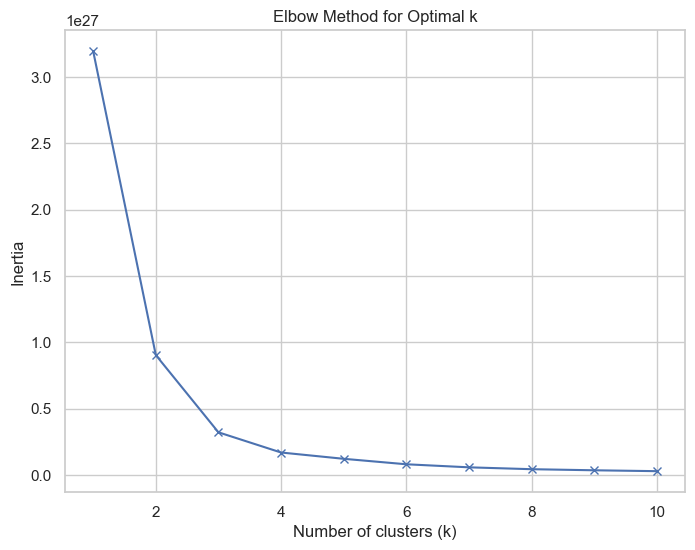

C:\Users\lokio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lokio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lokio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lokio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

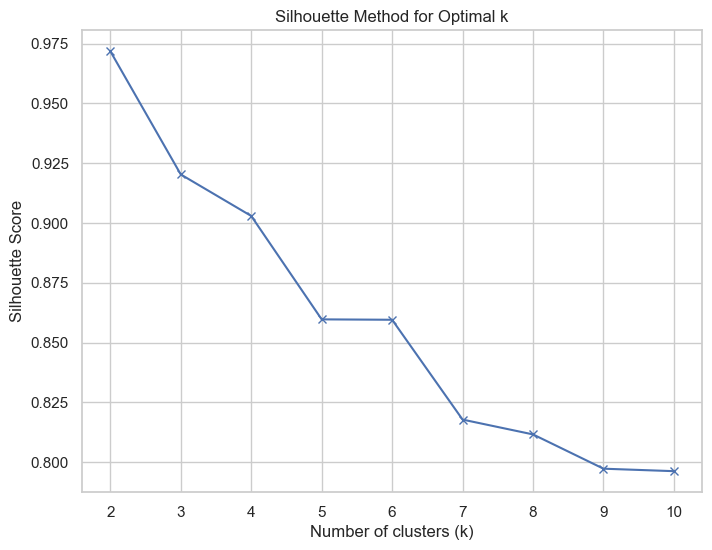

The best number of clusters based on Silhouette Score is 2


In [84]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming your dataset is already preprocessed and named `data_filtered`
# X should be the numeric columns of `data_filtered` you want to use for clustering

# Step 1: Elbow Method (already done)
inertia = []
K_range = range(1, 11)  # Let's try k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_filtered)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 2: Silhouette Score for Hyperparameter Tuning
silhouette_scores = []

for k in range(2, 11):  # Silhouette score is only valid for k > 1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_filtered)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_filtered, labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Silhouette scores
plt.figure(figsize=(8,6))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

# Step 3: Choose the best k based on highest Silhouette Score
best_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters based on Silhouette Score is {best_k}")


In [92]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming data_filtered is your dataframe
# Standardize the features for DBSCAN, as it is sensitive to scale
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered.drop(['Country_encoded', 'is_outlier', 'Cluster'], axis=1))

# Initialize variables to store the best parameters and results
best_eps = None
best_min_samples = None
best_n_clusters = 0
best_noise = len(data_filtered)  # initialize with max noise

# Range of values for eps and min_samples
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 10, 15]

# Try different combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_scaled)
        
        # Calculate the number of clusters and noise points
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        # Update best parameters if this setting gives fewer noise points and more clusters
        if n_noise < best_noise and n_clusters > best_n_clusters:
            best_eps = eps
            best_min_samples = min_samples
            best_n_clusters = n_clusters
            best_noise = n_noise
            best_labels = labels

# Apply DBSCAN with the best parameters found
data_filtered['DBSCAN_Cluster'] = best_labels

# Print the best parameters
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Number of clusters: {best_n_clusters}")
print(f"Number of noise points: {best_noise}")

# Save the data to inspect the results
data_filtered.head()



Best eps: 0.5
Best min_samples: 5
Number of clusters: 59
Number of noise points: 2090


,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HourstodoTax,InfantMortalityRate,...,LifeExpectancyFemale,LifeExpectancyMale,MobilePhoneUsage,PopulationTotal,TourismInbound,TourismOutbound,Country_encoded,is_outlier,Cluster,DBSCAN_Cluster
0,0.020,48.966901,87931.0,26.0,94.875676,26998.0,5.479006e+10,0.035,302.068503,0.034,...,71.0,67.0,0.0,31719449,102000000.0,193000000.0,2.0,1,0,0
1,0.050,48.966901,9542.0,26.0,94.875676,7499.0,9.129595e+09,0.034,302.068503,0.128,...,47.0,44.0,0.0,13924930,34000000.0,146000000.0,5.0,-1,1,-1
2,0.043,48.966901,1617.0,26.0,94.875676,1983.0,2.359122e+09,0.043,302.068503,0.090,...,57.0,53.0,0.0,6949366,77000000.0,50000000.0,20.0,1,1,3
3,0.027,48.966901,4276.0,26.0,94.875676,1836.0,5.788312e+09,0.047,302.068503,0.054,...,52.0,49.0,0.1,1755375,227000000.0,209000000.0,25.0,1,1,-1
4,0.046,48.966901,1041.0,26.0,94.875676,14338.0,2.610959e+09,0.051,302.068503,0.096,...,52.0,49.0,0.0,11607944,23000000.0,30000000.0,29.0,1,1,29


In [93]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Assuming data_filtered is your dataframe
# Standardize the features for Hierarchical Clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered.drop(['Country_encoded', 'is_outlier', 'Cluster', 'DBSCAN_Cluster'], axis=1))

# Initialize variables to store the best parameters and results
best_linkage = None
best_distance_threshold = None
best_n_clusters = 0

# Range of values for distance threshold and linkage types
distance_thresholds = np.arange(0.5, 5.0, 0.5)  # Example range, adjust as needed
linkage_criteria = ['ward', 'complete', 'average', 'single']

# Try different combinations of linkage criteria and distance thresholds
for linkage in linkage_criteria:
    for distance in distance_thresholds:
        # Apply AgglomerativeClustering
        clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=distance, linkage=linkage)
        labels = clustering.fit_predict(data_scaled)
        
        # Calculate the number of clusters
        n_clusters = len(set(labels))
        
        # Update best parameters if this setting gives more clusters
        if n_clusters > best_n_clusters:
            best_linkage = linkage
            best_distance_threshold = distance
            best_n_clusters = n_clusters
            best_labels = labels

# Apply hierarchical clustering with the best parameters found
data_filtered['Hierarchical_Cluster'] = best_labels

# Print the best parameters
print(f"Best linkage: {best_linkage}")
print(f"Best distance threshold: {best_distance_threshold}")
print(f"Number of clusters: {best_n_clusters}")

# Save the data to inspect the results
data_filtered.head()


Best linkage: ward
Best distance threshold: 0.5
Number of clusters: 1664


,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HourstodoTax,InfantMortalityRate,...,LifeExpectancyMale,MobilePhoneUsage,PopulationTotal,TourismInbound,TourismOutbound,Country_encoded,is_outlier,Cluster,DBSCAN_Cluster,Hierarchical_Cluster
0,0.020,48.966901,87931.0,26.0,94.875676,26998.0,5.479006e+10,0.035,302.068503,0.034,...,67.0,0.0,31719449,102000000.0,193000000.0,2.0,1,0,0,337
1,0.050,48.966901,9542.0,26.0,94.875676,7499.0,9.129595e+09,0.034,302.068503,0.128,...,44.0,0.0,13924930,34000000.0,146000000.0,5.0,-1,1,-1,1086
2,0.043,48.966901,1617.0,26.0,94.875676,1983.0,2.359122e+09,0.043,302.068503,0.090,...,53.0,0.0,6949366,77000000.0,50000000.0,20.0,1,1,3,1511
3,0.027,48.966901,4276.0,26.0,94.875676,1836.0,5.788312e+09,0.047,302.068503,0.054,...,49.0,0.1,1755375,227000000.0,209000000.0,25.0,1,1,-1,1650
4,0.046,48.966901,1041.0,26.0,94.875676,14338.0,2.610959e+09,0.051,302.068503,0.096,...,49.0,0.0,11607944,23000000.0,30000000.0,29.0,1,1,29,504


In [94]:
# Display all column names in data_filtered
column_names = data_filtered.columns.tolist()
print(column_names)


['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness', 'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP', 'HourstodoTax', 'InfantMortalityRate', 'InternetUsage', 'LendingInterest', 'LifeExpectancyFemale', 'LifeExpectancyMale', 'MobilePhoneUsage', 'PopulationTotal', 'TourismInbound', 'TourismOutbound', 'Country_encoded', 'is_outlier', 'Cluster', 'DBSCAN_Cluster', 'Hierarchical_Cluster']


In [102]:


# Example training data (assuming df is your DataFrame with all features)
features = [
    'BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
    'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP',
    'HourstodoTax', 'InfantMortalityRate', 'InternetUsage',
    'LendingInterest', 'LifeExpectancyFemale', 'LifeExpectancyMale',
    'MobilePhoneUsage', 'PopulationTotal', 'TourismInbound',
    'TourismOutbound', 'Country_encoded'
]

# Create the feature DataFrame without 'Cluster' and 'is_outlier'
X = data[features]
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans.fit(X)


C:\Users\lokio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [117]:
import pandas as pd
from sklearn.cluster import KMeans

# Example DataFrame creation (for demonstration; replace this with your actual DataFrame)
# Assuming 'data' is your DataFrame with all features
# data = pd.read_csv('your_data_file.csv')  # Load your actual data

# Define your features (without 'Cluster' and 'is_outlier')
features = [
    'BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
    'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP',
    'HourstodoTax', 'InfantMortalityRate', 'InternetUsage',
    'LendingInterest', 'LifeExpectancyFemale', 'LifeExpectancyMale',
    'MobilePhoneUsage', 'PopulationTotal', 'TourismInbound',
    'TourismOutbound', 'Country_encoded'
]



# Create the feature DataFrame for training
X = data[features]
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans.fit(X)

# Define the prediction function
def predict_cluster(new_data):
    """
    Predict the cluster for new data input based on the trained KMeans model.

    Parameters:
    - new_data: A dictionary of the input values matching the columns used for clustering.

    Returns:
    - Predicted cluster label.
    """
    # Convert the input dictionary to a DataFrame to match the model's input format
    new_data_df = pd.DataFrame([new_data])
    
    # Ensure the DataFrame has only the required columns
    new_data_df = new_data_df[features]  # Keep only relevant features
    
    # Predict the cluster
    cluster = kmeans.predict(new_data_df)[0]
    return cluster

# User input function
def get_user_input():
    user_input = {}
    print("Enter values for the following features:")
    for column in features:
        while True:
            try:
                value = float(input(f"{column}: "))  # Convert input to float
                user_input[column] = value
                break  # Exit loop if conversion is successful
            except ValueError:
                print("Invalid input. Please enter a numerical value.")
    return user_input

# Main execution
if __name__ == "__main__":
    # Get user input
    new_input = get_user_input()

    # Predict the cluster for the new input
    predicted_cluster = predict_cluster(new_input)
    print(f"The predicted cluster for the input is: {predicted_cluster}")


C:\Users\lokio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Enter values for the following features:


BirthRate:  4
BusinessTaxRate:  4
CO2Emissions:  4
DaystoStartBusiness:  4
EaseofBusiness:  4
EnergyUsage:  4
GDP:  4
HealthExpGDP:  4
HourstodoTax:  4
InfantMortalityRate:  4
InternetUsage:  4
LendingInterest:  4
LifeExpectancyFemale:  4
LifeExpectancyMale:  4
MobilePhoneUsage:  4
PopulationTotal:  4
TourismInbound:  5
TourismOutbound:  3
Country_encoded:  3


The predicted cluster for the input is: 1


In [141]:
data_no_outliers.to_excel("data_output.xlsx", index=False)

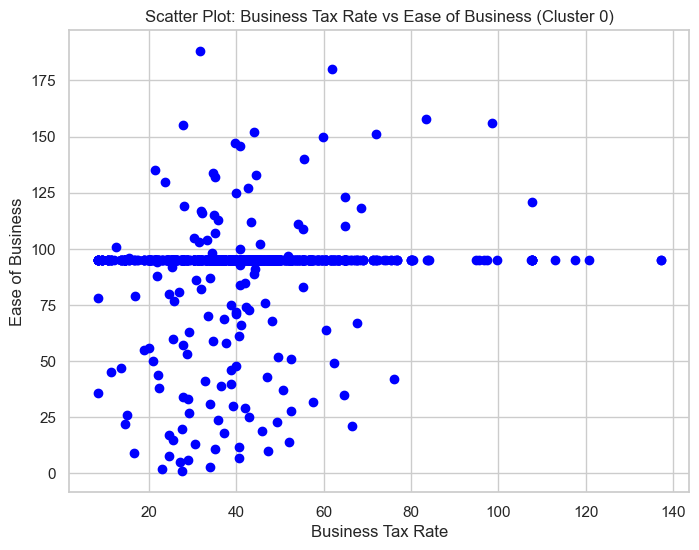

In [85]:
import matplotlib.pyplot as plt

# Scatter plot between 'BusinessTaxRate' and 'EaseofBusiness'
plt.figure(figsize=(8, 6))
plt.scatter(cluster_0_data['BusinessTaxRate'], cluster_0_data['EaseofBusiness'], color='blue')

# Add labels and title
plt.xlabel('Business Tax Rate')
plt.ylabel('Ease of Business')
plt.title('Scatter Plot: Business Tax Rate vs Ease of Business (Cluster 0)')

# Show plot
plt.grid(True)
plt.show()


In [86]:
# Assuming the cluster labels are stored in a column named 'cluster'
# Filter the rows where cluster == 1
cluster_1_data = data_filtered[data_filtered['Cluster'] == 1]

# Display the filtered data for Cluster 1
print(cluster_1_data)


      BirthRate  BusinessTaxRate  CO2Emissions  DaystoStartBusiness  \
1         0.050        48.966901        9542.0                 26.0   
2         0.043        48.966901        1617.0                 26.0   
3         0.027        48.966901        4276.0                 26.0   
4         0.046        48.966901        1041.0                 26.0   
5         0.042        48.966901         301.0                 26.0   
...         ...              ...           ...                  ...   
2579      0.036        11.000000        8529.0                 94.0   
2643      0.031        32.700000        8529.0                 40.0   
2654      0.029        42.100000        8529.0                 53.0   
2683      0.026        40.400000        8529.0                105.0   
2697      0.018        27.900000        8529.0                694.0   

      EaseofBusiness  EnergyUsage           GDP  HealthExpGDP  HourstodoTax  \
1          94.875676       7499.0  9.129595e+09         0.034    302

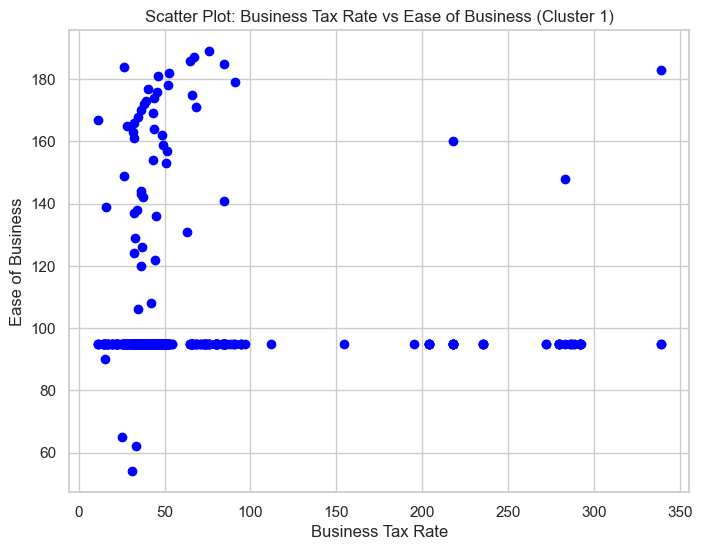

In [87]:
import matplotlib.pyplot as plt

# Scatter plot between 'BusinessTaxRate' and 'EaseofBusiness'
plt.figure(figsize=(8, 6))
plt.scatter(cluster_1_data['BusinessTaxRate'], cluster_1_data['EaseofBusiness'], color='blue')

# Add labels and title
plt.xlabel('Business Tax Rate')
plt.ylabel('Ease of Business')
plt.title('Scatter Plot: Business Tax Rate vs Ease of Business (Cluster 1)')

# Show plot
plt.grid(True)
plt.show()


In [88]:
# Assuming the cluster labels are stored in a column named 'cluster'
# Filter the rows where cluster == 1
cluster_2_data = data_filtered[data_filtered['Cluster'] == 2]

# Display the filtered data for Cluster 1
print(cluster_2_data)


      BirthRate  BusinessTaxRate  CO2Emissions  DaystoStartBusiness  \
60        0.014        48.966901     3405180.0                 26.0   
204       0.014        48.966901     5713560.0                 26.0   
268       0.013        48.966901     3487566.0                 26.0   
412       0.014        48.966901     5601405.0                 26.0   
476       0.013        48.966901     3694242.0                 26.0   
620       0.014        48.966901     5650950.0                 26.0   
684       0.012        48.966901     4525177.0                 48.0   
828       0.014        48.966901     5681664.0                  6.0   
892       0.012        48.966901     5288166.0                 48.0   
1036      0.014        48.966901     5790765.0                  6.0   
1100      0.012        80.000000     5790017.0                 48.0   
1244      0.014        45.800000     5826394.0                  6.0   
1308      0.012        80.700000     6414463.0                 35.0   
1452  

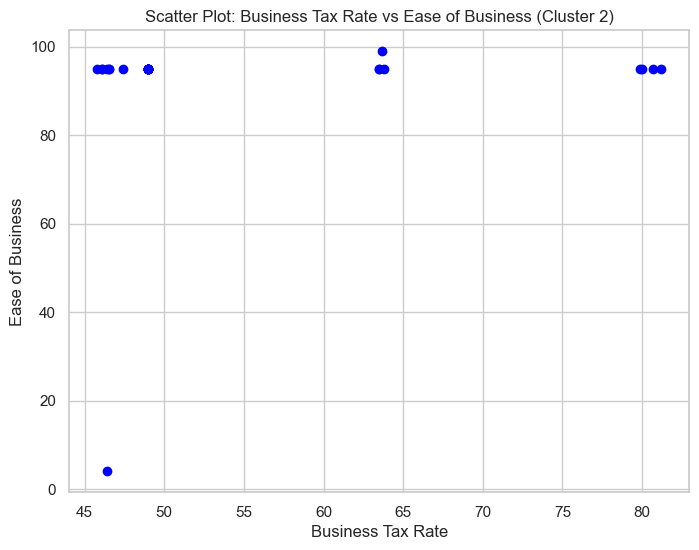

In [89]:
import matplotlib.pyplot as plt

# Scatter plot between 'BusinessTaxRate' and 'EaseofBusiness'
plt.figure(figsize=(8, 6))
plt.scatter(cluster_2_data['BusinessTaxRate'], cluster_2_data['EaseofBusiness'], color='blue')

# Add labels and title
plt.xlabel('Business Tax Rate')
plt.ylabel('Ease of Business')
plt.title('Scatter Plot: Business Tax Rate vs Ease of Business (Cluster 2)')

# Show plot
plt.grid(True)
plt.show()


In [90]:
data_filtered

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HourstodoTax,InfantMortalityRate,...,LendingInterest,LifeExpectancyFemale,LifeExpectancyMale,MobilePhoneUsage,PopulationTotal,TourismInbound,TourismOutbound,Country_encoded,is_outlier,Cluster
0,0.020,48.966901,87931.0,26.0,94.875676,26998.0,5.479006e+10,0.03500,302.068503,0.034,...,0.100,71.0,67.0,0.0,31719449,1.020000e+08,1.930000e+08,2.0,1,0
1,0.050,48.966901,9542.0,26.0,94.875676,7499.0,9.129595e+09,0.03400,302.068503,0.128,...,1.032,47.0,44.0,0.0,13924930,3.400000e+07,1.460000e+08,5.0,-1,1
2,0.043,48.966901,1617.0,26.0,94.875676,1983.0,2.359122e+09,0.04300,302.068503,0.090,...,0.120,57.0,53.0,0.0,6949366,7.700000e+07,5.000000e+07,20.0,1,1
3,0.027,48.966901,4276.0,26.0,94.875676,1836.0,5.788312e+09,0.04700,302.068503,0.054,...,0.155,52.0,49.0,0.1,1755375,2.270000e+08,2.090000e+08,25.0,1,1
4,0.046,48.966901,1041.0,26.0,94.875676,14338.0,2.610959e+09,0.05100,302.068503,0.096,...,0.120,52.0,49.0,0.0,11607944,2.300000e+07,3.000000e+07,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,48.966901,8529.0,26.0,94.875676,14338.0,1.507975e+10,0.06417,302.068503,0.020,...,0.120,75.0,69.0,0.5,32427,6.885000e+08,4.560000e+08,193.0,1,0
2700,0.013,46.400000,8529.0,5.0,4.000000,2132446.0,1.624460e+13,0.17900,175.000000,0.006,...,0.033,81.0,76.0,1.0,313873685,2.000920e+11,1.265730e+11,198.0,-1,2
2701,0.015,41.900000,8529.0,7.0,85.000000,14338.0,5.000435e+10,0.08900,310.000000,0.010,...,0.112,80.0,74.0,1.5,3395253,2.222000e+09,1.028000e+09,199.0,1,0
2702,0.020,61.900000,8529.0,144.0,180.000000,14338.0,3.812862e+11,0.04600,792.000000,0.013,...,0.164,78.0,72.0,1.0,29954782,9.040000e+08,3.202000e+09,202.0,-1,0


In [145]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib

# Load the data from the Excel file
data = pd.read_excel("data_output.xlsx")

# Define the features to be used for clustering
features = [
    'BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
    'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP',
    'HourstodoTax', 'InfantMortalityRate', 'InternetUsage',
    'LendingInterest', 'LifeExpectancyFemale', 'LifeExpectancyMale',
    'MobilePhoneUsage', 'PopulationTotal', 'TourismInbound',
    'TourismOutbound', 'Country_encoded'
]

# Extract the feature DataFrame and apply scaling
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the KMeans model on the scaled data
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans.fit(X_scaled)

# Save the trained model and scaler
joblib.dump(kmeans, "kmeans_model.joblib")
joblib.dump(scaler, "scaler.joblib")


C:\Users\lokio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


['scaler.joblib']